In [1]:
names = open('names.txt',"r").read().splitlines()

In [2]:
len(names)

32033

In [3]:
#create bigrams for all the words
b = {}

for i in names:
    chs = ["<S>"] + list(i) + ["<E>"]
    for ch1,ch2  in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram]=b.get(bigram,0)+1

In [4]:
b.get(('e', 'm'))

769

In [5]:
sorted(b.items(),key=lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [32]:
N = torch.zeros((27,27),dtype=torch.int32)

In [33]:
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [24]:
chars = sorted(set(''.join(names)))
stoi = {k:i+1 for i,k in enumerate(chars)}
stoi['.'] = 0


In [45]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [46]:
itos = {v:k for k,v in stoi.items()}

In [47]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [34]:
for n in names:
    chs = ["."] + list(n) + ["."]
    for ch1,ch2 in zip(chs,chs[1:]):
        ix = stoi[ch1]
        iy = stoi[ch2]
        N[ix,iy] += 1

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline  

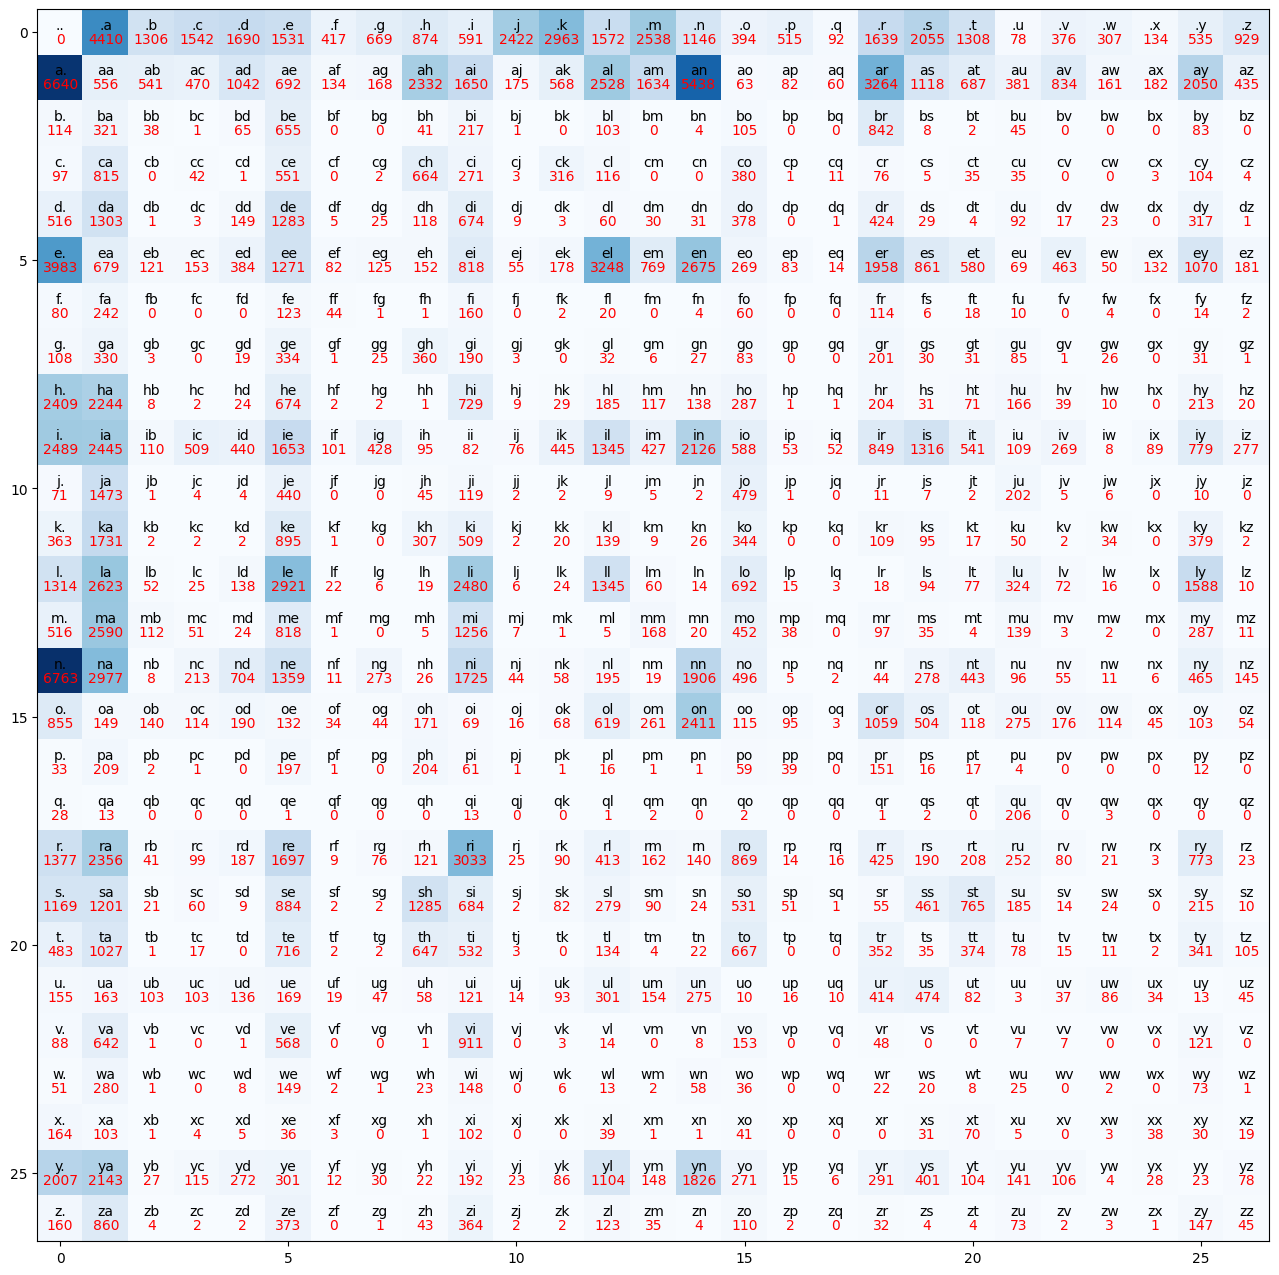

In [54]:

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(len(N)):
    for j in range(len(N)):
        ch = itos[i]+itos[j]
        plt.text(j,i,ch,ha="center",va="bottom")
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color='red')



In [57]:
p = N[0].float()
p = p/p.sum()

In [58]:
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [60]:
p.sum()

tensor(1.)

In [104]:
prob = torch.tensor([0.1,0.4,0.6])
a = torch.multinomial(prob,num_samples=100,replacement=True)
dix = {}
for i in a:
    b = i.item()
    dix[b] = dix.get(b,0)+1
dix

{1: 36, 2: 57, 0: 7}

In [92]:
ix = torch.multinomial(p,num_samples=1).item()
itos[ix]

'r'

In [126]:
g = torch.Generator().manual_seed(2147483647)
p = N[0].float()
p = p/p.sum()
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [124]:
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [148]:

g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    p = N[0].float()
    p = p/p.sum()

    out=[]
    while True:
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        p = N[ix].float()
        p = p/p.sum()
        
        if ix==0:
            break
    print(''.join(out))
    

junide.
janasah.
p.
cony.
a.


In [186]:
# to improve efficiency

P = (N+1).float()
P /=P.sum(1,keepdim=True)

g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0

    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])

        if ix==0:
            break

    print("".join(out))

junide.
janasah.
p.
cony.
a.


In [156]:
P

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [164]:
log_likelihood = 0.0
n = 0

for w in names:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048


In [192]:
log_likelihood = 0.0
n = 0
for i in ["saheer"]:
    chs = ['.'] + list(i) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        print(ch1,ch2)
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1



. s
s a
a h
h e
e e
e r
r .


In [195]:
log_likelihood

tensor(-17.1083)

In [198]:
#now approach the above problem by using neural net
# Creating the training set

xs, ys = [], []

for w in names[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [204]:
[itos[i.item()] for i in xs]


['.', 'e', 'm', 'm', 'a']

In [205]:
[itos[i.item()] for i in ys]


['e', 'm', 'm', 'a', '.']

In [211]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()

In [212]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

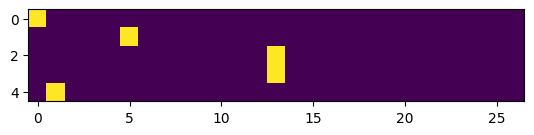

In [213]:
plt.imshow(xenc)

In [210]:
xs

tensor([ 0,  5, 13, 13,  1])

In [214]:
W = torch.randn((27,1))

In [216]:
W.shape

torch.Size([27, 1])

In [217]:
xenc.shape

torch.Size([5, 27])

In [218]:
xenc @ W

tensor([[ 0.2862],
        [ 1.5971],
        [ 0.1381],
        [ 0.1381],
        [-1.1644]])

In [219]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [220]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [244]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [228]:
torch.arange(5)


tensor([0, 1, 2, 3, 4])

In [227]:
probs.shape

torch.Size([5, 27])

In [225]:
probs.shape

torch.Size([5, 27])

In [242]:
xs

tensor([ 0,  5, 13, 13,  1])

In [243]:
ys

tensor([ 5, 13, 13,  1,  0])

In [241]:
x = xs[0].item()
y = ys[0].item()

In [229]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [230]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [231]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [232]:
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [236]:
probs[[0,2],1]

tensor([0.0100, 0.0737], grad_fn=<IndexBackward0>)

In [234]:
-probs[]

tensor([[-0.0607, -0.0100, -0.0123, -0.0042, -0.0168, -0.0123, -0.0027, -0.0232,
         -0.0137, -0.0313, -0.0079, -0.0278, -0.0091, -0.0082, -0.0500, -0.2378,
         -0.0603, -0.0025, -0.0249, -0.0055, -0.0339, -0.0109, -0.0029, -0.0198,
         -0.0118, -0.1537, -0.1459],
        [-0.0290, -0.0796, -0.0248, -0.0521, -0.1989, -0.0289, -0.0094, -0.0335,
         -0.0097, -0.0301, -0.0702, -0.0228, -0.0115, -0.0181, -0.0108, -0.0315,
         -0.0291, -0.0045, -0.0916, -0.0215, -0.0486, -0.0300, -0.0501, -0.0027,
         -0.0118, -0.0022, -0.0472],
        [-0.0312, -0.0737, -0.0484, -0.0333, -0.0674, -0.0200, -0.0263, -0.0249,
         -0.1226, -0.0164, -0.0075, -0.0789, -0.0131, -0.0267, -0.0147, -0.0112,
         -0.0585, -0.0121, -0.0650, -0.0058, -0.0208, -0.0078, -0.0133, -0.0203,
         -0.1204, -0.0469, -0.0126],
        [-0.0312, -0.0737, -0.0484, -0.0333, -0.0674, -0.0200, -0.0263, -0.0249,
         -0.1226, -0.0164, -0.0075, -0.0789, -0.0131, -0.0267, -0.0147, -0.0112

In [245]:
-probs[torch.arange(5), ys]

tensor([-0.0123, -0.0181, -0.0267, -0.0737, -0.0150], grad_fn=<NegBackward0>)

In [248]:
-probs[0,5]

tensor(-0.0123, grad_fn=<NegBackward0>)

In [250]:
-probs[1,13]

tensor(-0.0181, grad_fn=<NegBackward0>)

In [261]:
# create the dataset
xs, ys = [], []
for w in names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [266]:
for k in range(1000):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.488229274749756
2.488151788711548
2.4880776405334473
2.4880053997039795
2.4879348278045654
2.487866163253784
2.4877989292144775
2.4877326488494873
2.48766827583313
2.4876043796539307
2.487541675567627
2.4874799251556396
2.4874191284179688
2.4873592853546143
2.487300395965576
2.4872419834136963
2.487184762954712
2.4871280193328857
2.487071990966797
2.4870169162750244
2.48696231842041
2.486908197402954
2.4868550300598145
2.486802339553833
2.486750364303589
2.486698865890503
2.486647605895996
2.486597776412964
2.4865479469299316
2.4864988327026367
2.486449956893921
2.4864020347595215
2.486354112625122
2.48630690574646
2.486260414123535
2.4862139225006104
2.486168146133423
2.4861228466033936
2.4860777854919434
2.4860336780548096
2.485989809036255
2.4859461784362793
2.485902786254883
2.4858603477478027
2.4858181476593018
2.4857757091522217
2.485734224319458
2.4856929779052734
2.4856526851654053
2.485612154006958
2.485572099685669
2.485532522201538
2.4854931831359863
2.4854540824890137
2.4

In [268]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [256]:
junide.
janasah.
p.
cfay.
a.

SyntaxError: invalid syntax (2653331602.py, line 1)